# Package import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
random.seed(9001) # For Reproducibility of Results
%matplotlib inline
pd.set_option('display.max_rows', 300)

# Data Load

In [2]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeArea/populationCount.csv', skiprows=8) # 105*8
ageStructure = pd.read_csv('postcodeArea/ageStructure.csv', skiprows=8) #105*20
relationalSituation = pd.read_csv('postcodeArea/relational.csv', skiprows=8) #105*8
livingArrangements = pd.read_csv('postcodeArea/livingArrangements.csv', skiprows=8) #105*9
householdComposition = pd.read_csv('postcodeArea/householdComposition.csv', skiprows=8) #105*23
notInEmploymentDependencies = pd.read_csv('postcodeArea/notInEmploymentDependencies.csv', skiprows=8) #105*10
loneParentDependencies = pd.read_csv('postcodeArea/loneParentDependencies.csv', skiprows=8)#105*13
ethnicGroup = pd.read_csv('postcodeArea/ethnicGroup.csv', skiprows=8) #105*25
industry = pd.read_csv('postcodeArea/industry.csv', skiprows=8)#105*26
tenure = pd.read_csv('postcodeArea/tenure.csv', skiprows=7) #105*8
hoursWorked = pd.read_csv('postcodeArea/hoursWorked.csv', skiprows=8) #105*6
dwelling = pd.read_csv('postcodeArea/dwelling.csv', skiprows=8) #105*5
englishProf = pd.read_csv('postcodeArea/englishProf.csv', skiprows=8) #105*7
centralHeating = pd.read_csv('postcodeArea/centralHeating.csv', skiprows=8) #105*9
passportHeld = pd.read_csv('postcodeArea/passportHeld.csv', skiprows=7) #105*73
birthCountry = pd.read_csv('postcodeArea/birthCountry.csv', skiprows=8) #105*9
religion = pd.read_csv('postcodeArea/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeArea/generalHealth.csv', skiprows=8) #105*7
yearLastWorked = pd.read_csv('postcodeArea/yearLastWorked.csv', skiprows=8) #105*13
householdSize = pd.read_csv('postcodeArea/householdSize.csv', skiprows=8) #105*10
carOrVanAvailability = pd.read_csv('postcodeArea/carOrVanAvailability.csv', skiprows=8) #105*7
distanceTravelledtoWork = pd.read_csv('postcodeArea/distanceTravelledtoWork.csv', skiprows=8) #105*14
methodofTraveltoWork = pd.read_csv('postcodeArea/methodofTraveltoWork.csv', skiprows=8) #105*14
ageofArrival = pd.read_csv('postcodeArea/ageofArrival.csv', skiprows=8) #105*19
lengthofResidence = pd.read_csv('postcodeArea/lengthofResidence.csv', skiprows=8) #105*7
occupationType = pd.read_csv('postcodeArea/occupation.csv', skiprows=8) #105*11
mainLanguage = pd.read_csv('postcodeArea/mainLanguage.csv', skiprows=8) #105*105
bedrooms = pd.read_csv('postcodeArea/bedrooms.csv', skiprows=8) #105*8
longTermDisability = pd.read_csv('postcodeArea/longTermDisability.csv', skiprows=8) #105*5
economicActivity = pd.read_csv('postcodeArea/economicActivity.csv', skiprows=8) #105*17
positionInCommunalEstablishment = pd.read_csv('postcodeArea/positionInCommunalEstablishment.csv', skiprows=8) #105*5
accomType = pd.read_csv('postcodeArea/accomType.csv', skiprows=8) #105*13
secondAddress = pd.read_csv('postcodeArea/secondAddress.csv', skiprows=8) #105*6
formerIndustry = pd.read_csv('postcodeArea/formerIndustry.csv', skiprows=8) #105*11
formerOccupation = pd.read_csv('postcodeArea/formerOccupation.csv', skiprows=8) #105*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeArea/qualification.csv', skiprows=8) #105*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [3]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [4]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    29.5
Name: 0.7, dtype: float64

In [5]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=29.5, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

,postcode areas,target,perc
classification,,,
0,73,73,0.695238
1,32,32,0.304762


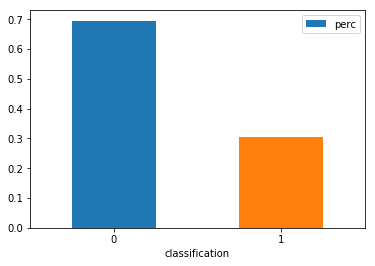

In [6]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [7]:
###Merge different datasets
newDF = [population, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode areas') for i in newDF],axis=1, join='outer')

In [8]:
#Check for dimensions
newDF2.shape

(109, 905)

In [9]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(105, 905)

In [10]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [11]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

In [12]:
newDF4.shape

(105, 854)

In [13]:
y = newDF4.classification

# TWO COMPONENT GRAPHICAL REPRESENTATION

In [14]:
start_time = timeit.default_timer()
x = newDF4.drop(['target','classification'], axis=1)

x = StandardScaler().fit_transform(x)
#REDUCE DIMENSIONS
pca = PCA(n_components=2)
#FIT MODEL
principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDF.shape

y = y.to_frame().reset_index()



finalDF = y.join(principalDF)


finalDF.columns = finalDF.columns.map(lambda x: x.replace(' ', '_'))

finalDF.head()

,postcode_areas,classification,principal_component_1,principal_component_2
0,AL - St Albans,1,-14.575824,-8.511973
1,B - Birmingham,0,72.869734,38.205547
2,BA - Bath,0,-7.841812,1.585155
3,BB - Blackburn,0,-8.590026,3.285280
4,BD - Bradford,0,-0.130228,3.172003


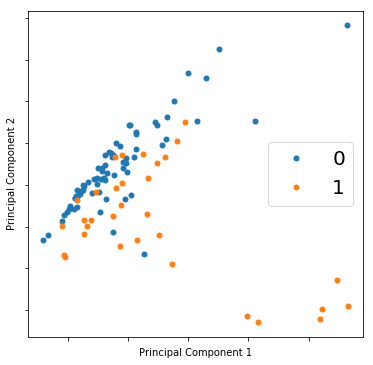

Time Elapsed:
0.11571780333211673


In [15]:
groups = finalDF.groupby('classification')

# Plot


fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
for name, group in groups:
    ax.plot(group.principal_component_1, group.principal_component_2, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel('Principal Component 1',fontsize=10)
ax.set_ylabel('Principal Component 2', fontsize=10)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.legend(loc=5, prop={'size': 20})
plt.show()


elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)

# ONE COMPONENT GRAPHICAL REPRESENTATION

In [16]:
finalDF = finalDF.replace(finalDF.principal_component_1.values, finalDF.classification.values)
finalDF

,postcode_areas,classification,principal_component_1,principal_component_2
0,AL - St Albans,1,1.0,-8.511973
1,B - Birmingham,0,0.0,38.205547
2,BA - Bath,0,0.0,1.585155
3,BB - Blackburn,0,0.0,3.285280
4,BD - Bradford,0,0.0,3.172003
5,BH - Bournemouth,0,0.0,3.950521
6,BL - Bolton,0,0.0,-1.984573
7,BN - Brighton,1,1.0,10.600561
8,BR - Bromley,1,1.0,-8.435661
9,BS - Bristol,1,1.0,14.949425


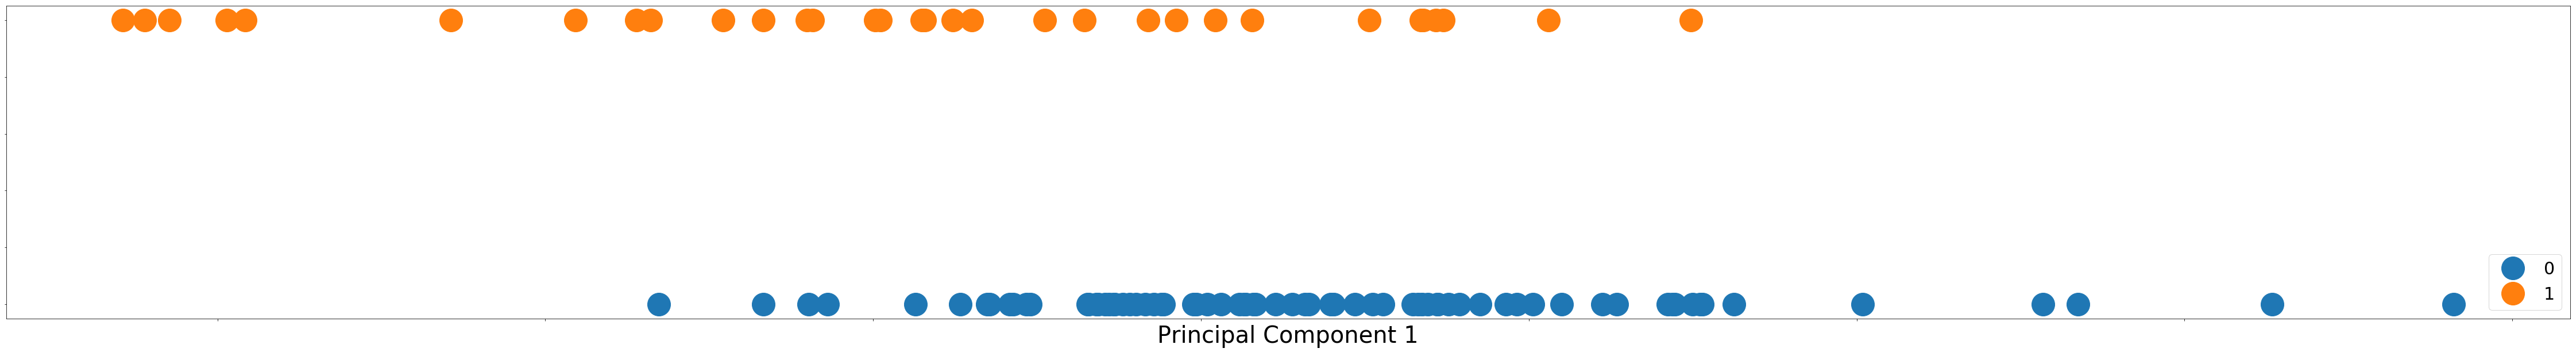

In [17]:
groups = finalDF.groupby('classification')

# Plot 

fig, ax = plt.subplots()
fig.set_size_inches(80, 10)
for name, group in groups:
    ax.plot(group.principal_component_2, group.principal_component_1, marker='o', linestyle='', ms=40, label=name)
ax.legend()
ax.set_xlabel('Principal Component 1',fontsize=40)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.legend(loc=4, prop={'size': 30})
plt.show()